In [1]:
import numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib.colorbar import Colorbar
import sys, os
from imp import reload
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
%matplotlib inline

sys.path.insert(0, "/Users/u14510182/Documents")
import AnalyzePlotFunctions as my_plot


train_data = pd.read_csv('titanic/train.csv')

In [2]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Binning

In [10]:
# Расчет точек биннинга переменной без использования таргета
print(my_plot.binning.points_calulation(train_data['Age']))

[-inf, 5.0, 17.0, 19.0, 23.5, 25.0, 29.0, 31.0, 34.5, 37.0, 41.0, 46.0, 53.0, inf]


In [14]:
# Расчет точек биннинга переменной с использованием таргета, при разбиении используется дерево решений
my_plot.binning.points_calculation_tree(var=train_data['Age'], target=train_data['Survived'], min_size=10, rnd=2)

[-inf, 16.5, 21.5, 26.5, 30.75, 36.25, 47.5, inf]

In [20]:
# Возвращает точки разбиения по всем переменным в датафрейме

# С таргетом
print(my_plot.binning.get_thresholds_for_data(data=train_data[['Age','Fare','Survived']], 
                                        target='Survived', min_size=10))
print('\n')
# Без таргета
print(my_plot.binning.get_thresholds_for_data(data=train_data[['Age','Fare',]], min_size=10))

{'Age': [-inf, 16.5, 21.5, 26.5, 30.75, 36.25, 47.5, inf], 'Fare': [-inf, 7.64, 7.88, 10.48, 15.17, 27.36, 74.38, inf]}


{'Age': [-inf, 15.0, 23.5, 27.0, 31.0, 37.0, 46.0, inf], 'Fare': [-inf, 7.52, 8.03, 10.46, 14.4, 21.08, 26.55, 39.6, 77.29, inf]}


In [24]:
# Производит бинниг переменной
my_plot.binning.bin_variable(var=train_data['Age'], target=train_data['Survived'], min_size=10)

[(21.5, 26.5], (36.25, 47.5], (21.5, 26.5], (30.75, 36.25], (30.75, 36.25], ..., (26.5, 30.75], (16.5, 21.5], Missing, (21.5, 26.5], (30.75, 36.25]]
Length: 891
Categories (8, object): [Missing < [<=16.5] < (16.5, 21.5] < (21.5, 26.5] < (26.5, 30.75] < (30.75, 36.25] < (36.25, 47.5] < (>47.5]]

# Variable stats

/Users/u14510182/Documents/AnalyzePlotFunctions/barline.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  points, data['bin'] = bin_variable(data[var], **binargs)


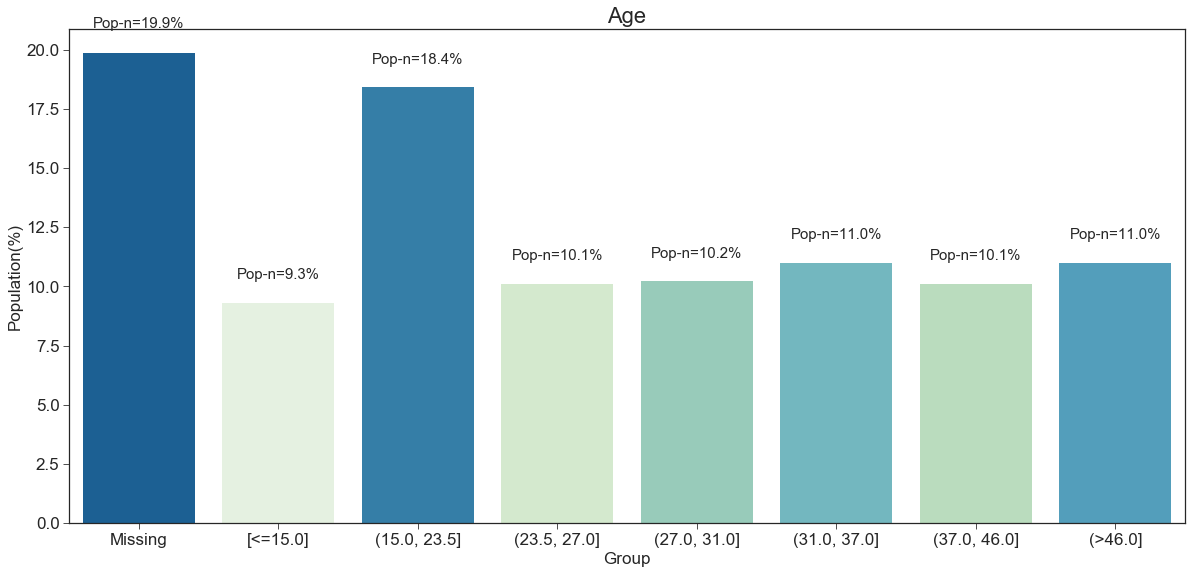



 [-np.inf, 15.0, 23.5, 27.0, 31.0, 37.0, 46.0, np.inf] 




,Name,Total,Population(%)
0,Missing,177,19.87
1,[<=15.0],83,9.32
2,"(15.0, 23.5]",164,18.41
3,"(23.5, 27.0]",90,10.10
4,"(27.0, 31.0]",91,10.21
5,"(31.0, 37.0]",98,11.00
6,"(37.0, 46.0]",90,10.10
7,(>46.0],98,11.00


In [2]:
# Без дополнительных настроек графика, он может выглядеть не очень.
my_plot.var_stat(train_data, var='Age', binargs={'min_size':10}, annotation=True)

/Users/u14510182/Documents/AnalyzePlotFunctions/barline.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  points, data['bin'] = bin_variable(data[var], **binargs)


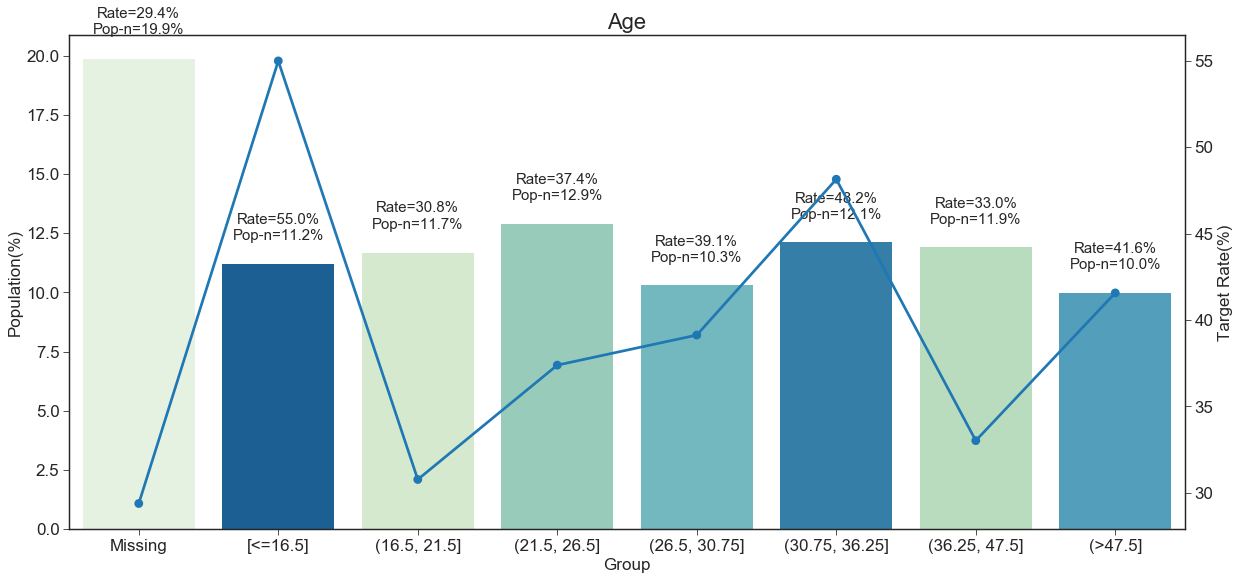



 [-np.inf, 16.5, 21.5, 26.5, 30.75, 36.25, 47.5, np.inf] 




,Name,Total,Bads,Population(%),Target Rate(%),WoE,Group_IV,Total_IV
0,Missing,177,52,19.87,29.38,-0.403782,3.054206,12.478764
1,[<=16.5],100,55,11.22,55.00,0.673958,5.314263,12.478764
2,"(16.5, 21.5]",104,32,11.67,30.77,-0.337643,1.268870,12.478764
3,"(21.5, 26.5]",115,43,12.91,37.39,-0.042178,0.022846,12.478764
4,"(26.5, 30.75]",92,36,10.33,39.13,0.031455,0.010253,12.478764
5,"(30.75, 36.25]",108,52,12.12,48.15,0.399180,1.997621,12.478764
6,"(36.25, 47.5]",106,35,11.90,33.02,-0.234044,0.631612,12.478764
7,(>47.5],89,37,9.99,41.57,0.132962,0.179093,12.478764


In [2]:
# Без дополнительных настроек графика, он может выглядеть не очень.
my_plot.var_stat(train_data, var='Age', target='Survived', binargs={'min_size':10}, annotation=True)

/Users/u14510182/Documents/AnalyzePlotFunctions/barline.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  points, data['bin'] = bin_variable(data[var], **binargs)


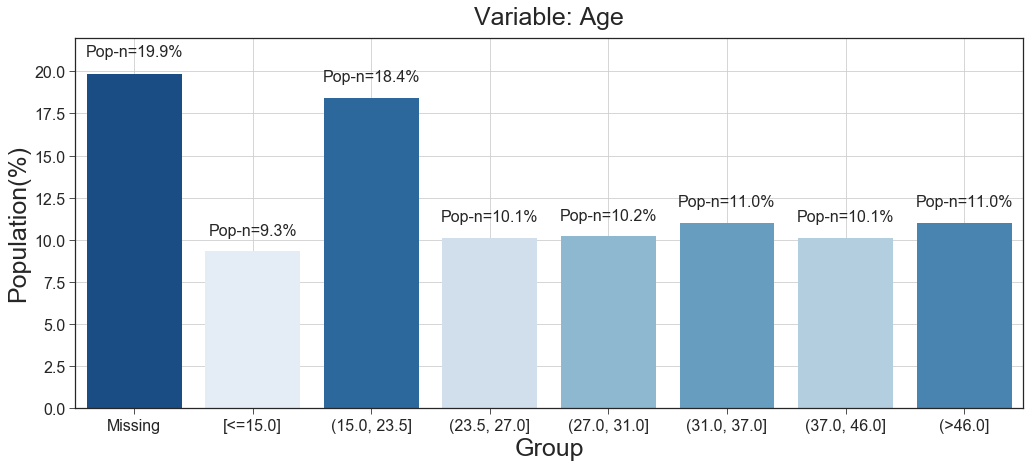



 [-np.inf, 15.0, 23.5, 27.0, 31.0, 37.0, 46.0, np.inf] 




,Name,Total,Population(%)
0,Missing,177,19.87
1,[<=15.0],83,9.32
2,"(15.0, 23.5]",164,18.41
3,"(23.5, 27.0]",90,10.10
4,"(27.0, 31.0]",91,10.21
5,"(31.0, 37.0]",98,11.00
6,"(37.0, 46.0]",90,10.10
7,(>46.0],98,11.00


In [26]:
my_config = my_plot.PlotConfig(
    figure_size=(17,15),
    colormap='Blues',
    title='Variable: Age',
    title_size=25,
    title_pad=1.02,
    ymax=22,
    annotation_font_size=16,
    x_grid=True,
    y_grid=True,
    y2_grid=True,
    xtick_size=16,
    ytick_size=16,
    ylabel_size=25,
    xlabel_size=25
    
)
my_plot.var_stat(train_data, var='Age', binargs={'min_size':10}, annotation=True, plot_config=my_config)

/Users/u14510182/Documents/AnalyzePlotFunctions/barline.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  points, data['bin'] = bin_variable(data[var], **binargs)


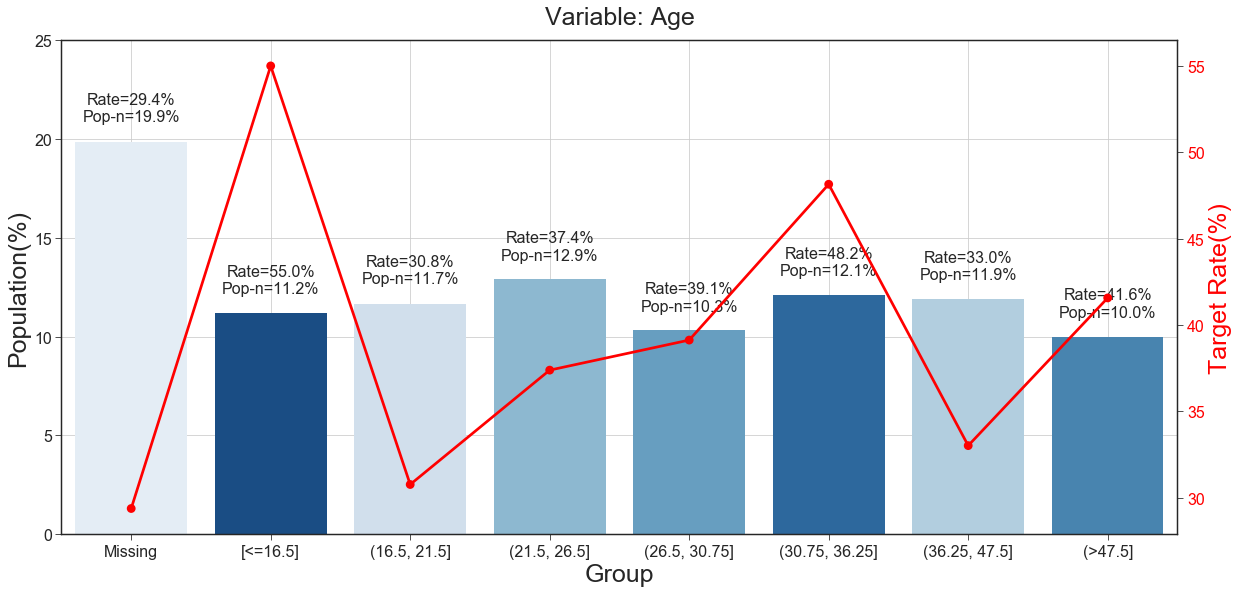

In [40]:
my_config = my_plot.PlotConfig(
    figure_size=(20,20),
    colormap='Blues',
    title='Variable: Age',
    title_size=25,
    title_pad=1.02,
    ymax=25,
    annotation_font_size=16,
    y2_color='Red',
    color2='Red',
    x_grid=True,
    y_grid=True,
    y2_grid=False,
    xtick_size=16,
    ytick_size=16,
    ylabel_size=25,
    xlabel_size=25,
    line_widths=1
)
vardf = my_plot.var_stat(train_data, var='Age', target='Survived', binargs={'min_size':10}, annotation=True, 
                 print_points=False, return_table=True, plot_config=my_config)

In [41]:
vardf

,Name,Total,Bads,Population(%),Target Rate(%),WoE,Group_IV,Total_IV
0,Missing,177,52,19.87,29.38,-0.403782,3.054206,12.478764
1,[<=16.5],100,55,11.22,55.00,0.673958,5.314263,12.478764
2,"(16.5, 21.5]",104,32,11.67,30.77,-0.337643,1.268870,12.478764
3,"(21.5, 26.5]",115,43,12.91,37.39,-0.042178,0.022846,12.478764
4,"(26.5, 30.75]",92,36,10.33,39.13,0.031455,0.010253,12.478764
5,"(30.75, 36.25]",108,52,12.12,48.15,0.399180,1.997621,12.478764
6,"(36.25, 47.5]",106,35,11.90,33.02,-0.234044,0.631612,12.478764
7,(>47.5],89,37,9.99,41.57,0.132962,0.179093,12.478764


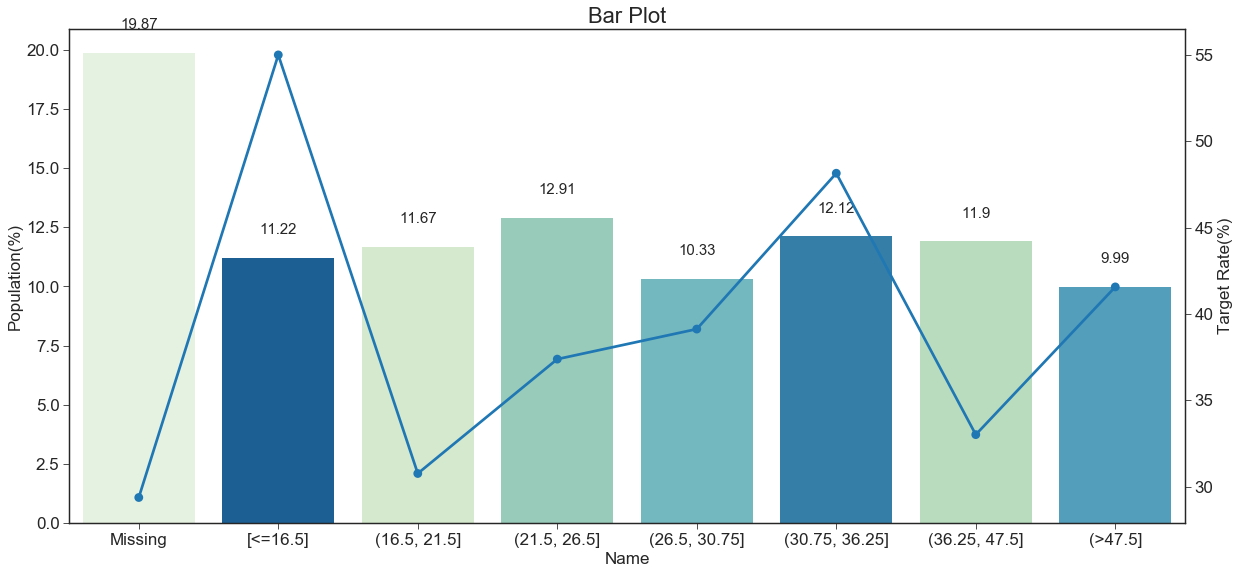

In [43]:
# Можно визуализировать агрегированную информацию по 3-м переменным x, y1, y2
# Можно аналогично настроить график.
my_plot.barline_plot(vardf, x='Name', y1='Population(%)', y2='Target Rate(%)', annot1=True, annot2=False)

# Correlation

In [46]:
# Cramér's V - аналог корреляции для категориальных переменных
my_plot.corrs.cramer_stat(train_data['Sex'], train_data['Pclass'])

0.1380133986221395

In [3]:
# Работает следующим образом. Выбираете переменные. Выбираете метод. Если выбираете крамера то происходит бинниг переменных если необходим.
# Если выбираете spearman, pearson, kendal то используется pandas.corr(method=...)
# В будущем добавить чтобы тип корреляции определялся в зависимости от типа переменных
# https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365#:~:text=The%20point%20biserial%20correlation%20is,relatively%20computationally%20inexpensive%20to%20compute.
corr_matrix = my_plot.corrs.correlation(train_data, select_vars=['Age','Pclass','Sex','Embarked','Fare'], 
                                  method='cramer_new', binargs={'target':'Survived'})

Start categorizing variables.
Start calculate correlations.


In [49]:
corr_matrix

,Age,Pclass,Sex,Embarked,Fare
Age,1.000000,0.294590,0.062623,0.243852,0.143515
Pclass,0.294590,1.000000,0.129690,0.259811,0.707952
Sex,0.062623,0.129690,1.000000,0.113072,0.332168
Embarked,0.243852,0.259811,0.113072,1.000000,0.425716
Fare,0.143515,0.707952,0.332168,0.425716,1.000000


/Users/u14510182/Documents/AnalyzePlotFunctions/corrs.py:107: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  y = hierarchy.linkage(d, method=method, metric=metric)


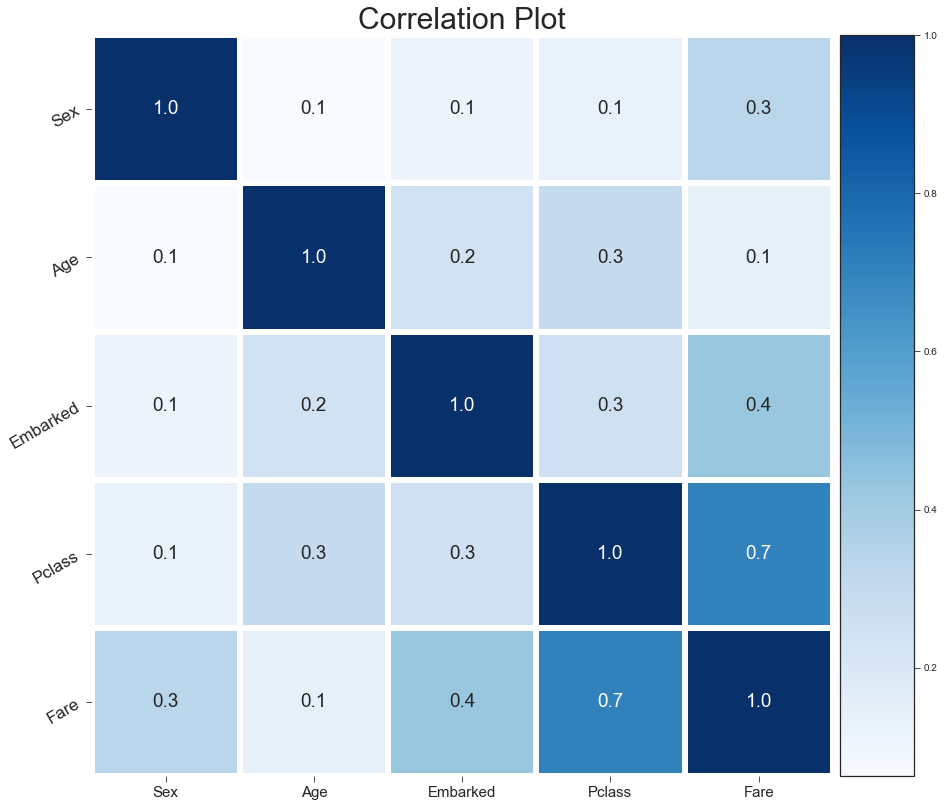

In [6]:
my_config = my_plot.PlotConfig(
    #style='ggplot',
    figure_size=(30,30),
    colormap='Blues',
    annotation_font_size=19,
    line_widths=5,
    cbar_location='right',
    cbar_width=10,
    cbar_tick_loc='right',
    xtick_loc='bottom',
    title='Correlation Plot',
    title_size=30,
    title_pad=1.1,
    xtick_size=15,
    y_rotation=30
)
my_plot.corrs.plot_corr(corr_matrix, annotation=True, reorder=True, plot_config=my_config)

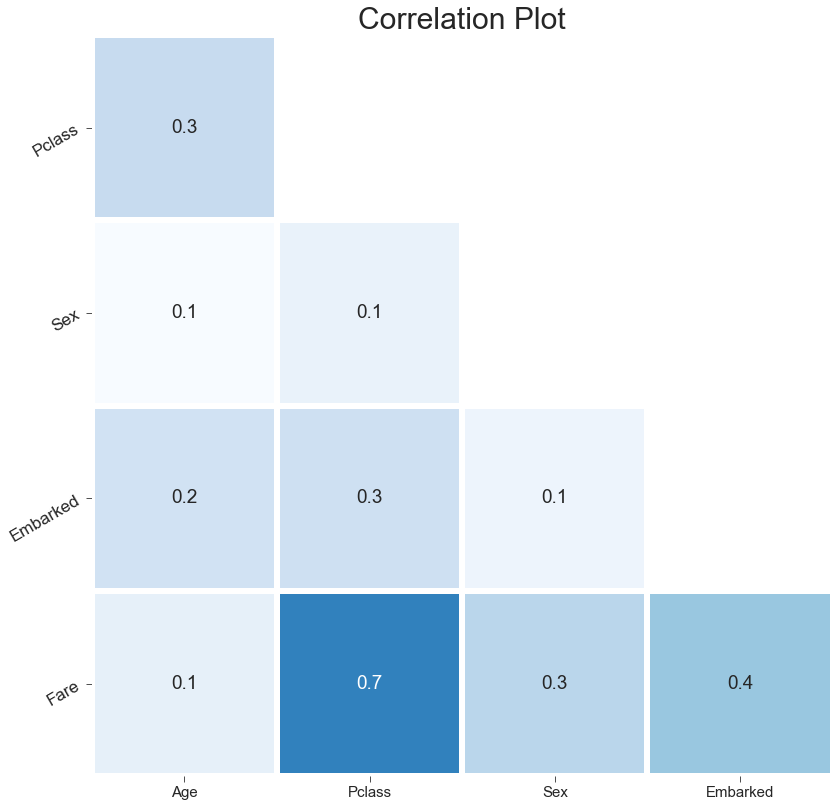

In [7]:
my_plot.corrs.plot_corr(corr_matrix, annotation=True, triangle='lower', colorbar=False, plot_config=my_config)

In [9]:
# Анализирует матрицу корреляций
my_plot.corrs.analyze_corr(corr_matrix)

,Variable,ABS_MAX,MEAN,MEDIAN,top_1,top_2,top_3,top_4
0,Age,0.294590,0.186145,0.193684,Pclass(0.29),Embarked(0.24),Fare(0.14),Sex(0.06)
1,Pclass,0.707952,0.348011,0.277200,Fare(0.71),Age(0.29),Embarked(0.26),Sex(0.13)
2,Sex,0.332168,0.159388,0.121381,Fare(0.33),Pclass(0.13),Embarked(0.11),Age(0.06)
3,Embarked,0.425716,0.260613,0.251831,Fare(0.43),Pclass(0.26),Age(0.24),Sex(0.11)
4,Fare,0.707952,0.402338,0.378942,Pclass(0.71),Embarked(0.43),Sex(0.33),Age(0.14)


# Cross Variable

Вы даете две переменные которые будем кросить. Если не дать целевую переменную, то мы оценим популяции на пересечениях групп.  
Если дать еще целевую переменную, то график изобразит статистику этой переменной. Функция статистики задается аргументом aggfunc.  
По умолчанию это просто усреднение.

In [9]:
test_config = my_plot.PlotConfig(
    figure_size=(15,15),
    cbar_location='bottom',
    cbar_pad=25,
    cbar_width=10,
    cbar_tick_loc='bottom',
    annotation_font_size=15,
    title_pad=-0.05,
    title_size=30,
    space=0.2
)

/Users/u14510182/Documents/AnalyzePlotFunctions/cross.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[var] = bin_variable(data[var], **binargs)
/Users/u14510182/Documents/AnalyzePlotFunctions/cross.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[var] = bin_variable(data[var], **binargs)


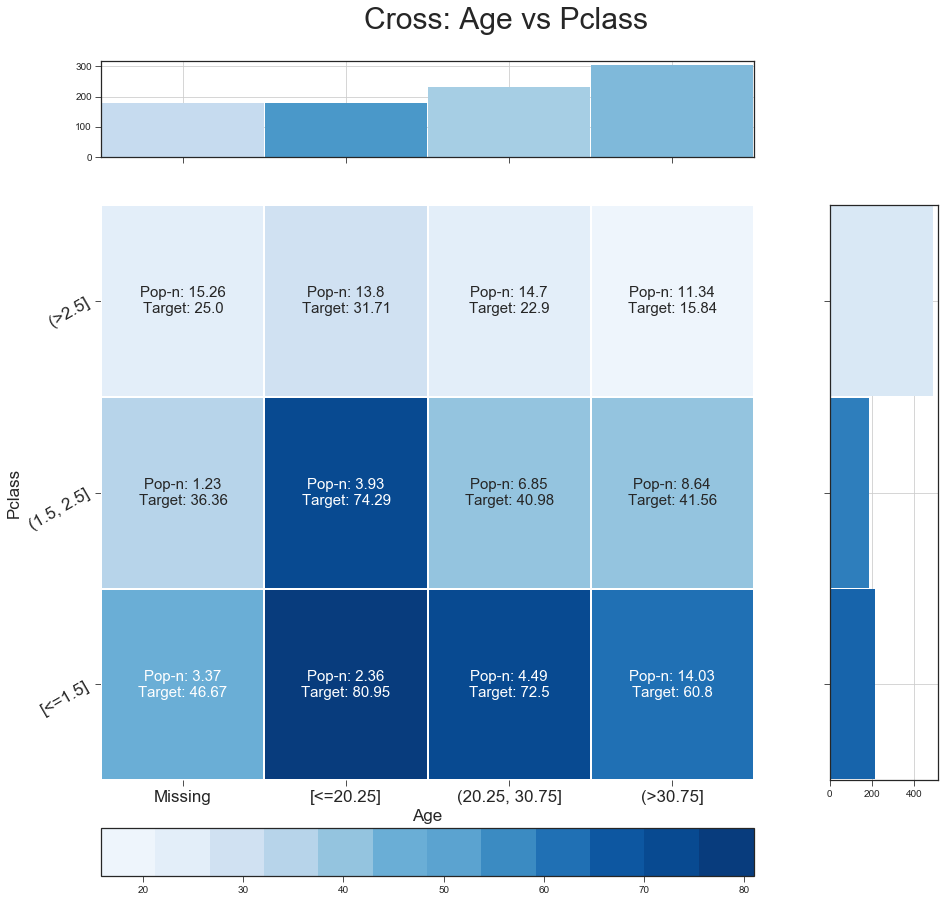

,Age,Pclass,size,target,prc
0,Missing,[<=1.5],30,46.666667,3.367003
1,Missing,"(1.5, 2.5]",11,36.363636,1.234568
2,Missing,(>2.5],136,25.000000,15.263749
3,[<=20.25],[<=1.5],21,80.952381,2.356902
4,[<=20.25],"(1.5, 2.5]",35,74.285714,3.928171
5,[<=20.25],(>2.5],123,31.707317,13.804714
6,"(20.25, 30.75]",[<=1.5],40,72.500000,4.489338
7,"(20.25, 30.75]","(1.5, 2.5]",61,40.983607,6.846240
8,"(20.25, 30.75]",(>2.5],131,22.900763,14.702581
9,(>30.75],[<=1.5],125,60.800000,14.029181


In [10]:
my_plot.cross_var_plot(train_data, var1='Age', var2='Pclass', target='Survived', annotation=True, histogram=True,
               binargs={'min_size':20}, show_min=1, rnd=2, table=True, plot_config=test_config)

/Users/u14510182/Documents/AnalyzePlotFunctions/cross.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[var] = bin_variable(data[var], **binargs)
/Users/u14510182/Documents/AnalyzePlotFunctions/cross.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[var] = bin_variable(data[var], **binargs)


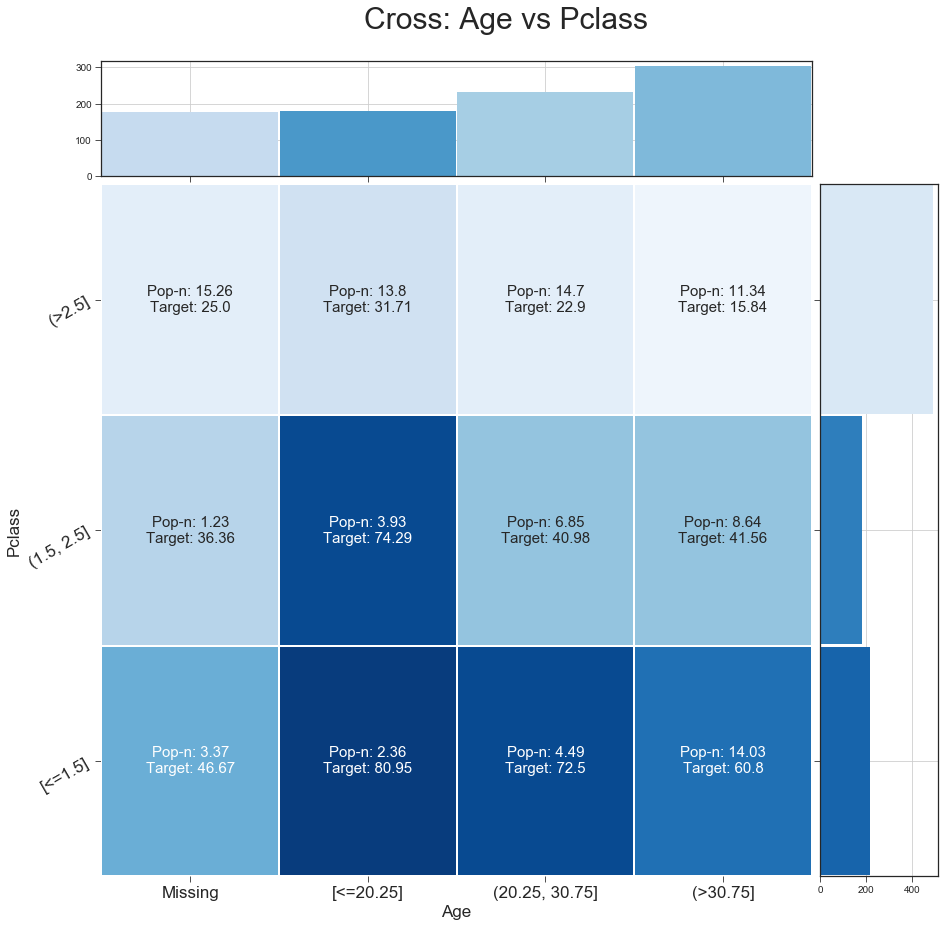

In [11]:
test_config = my_plot.PlotConfig(
    figure_size=(15,15),
    cbar_location='bottom',
    cbar_pad=25,
    cbar_width=10,
    cbar_tick_loc='bottom',
    annotation_font_size=15,
    title_pad=-0.05,
    title_size=30,
    space=0.02,
)

my_plot.cross_var_plot(train_data, var1='Age', var2='Pclass', target='Survived', annotation=True, histogram=True,
                       binargs={'min_size':20}, show_min=1, rnd=2, table=False, colorbar=False, plot_config=test_config)

# Metrics

In [2]:
X, y = make_classification(n_samples=80000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

n_estimator = 10
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
rt_lm = LogisticRegression(max_iter=1000)
grd = GradientBoostingClassifier(n_estimators=n_estimator)

rf.fit(X_train,y_train)
rt_lm.fit(X_train,y_train)
grd.fit(X_train,y_train)

/Users/u14510182/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [3]:
all_models = {'LogReg': rt_lm, 'RandomForest': rf, 'Boosting': grd}
all_stats = pd.DataFrame({
    'Type': ['Train']*len(y_train) + ['Test']*len(y_test),
    'True_Y': np.concatenate((y_train, y_test)),
})

for name, model in all_models.items():
    val1 = model.predict_proba(X_train)[:,1]
    val2 = model.predict_proba(X_test)[:,1]
    all_stats[name] = np.concatenate((val1, val2))

In [4]:
segments = {'Train': all_stats['Type'] == 'Train', 'Test': all_stats['Type'] == 'Test'}

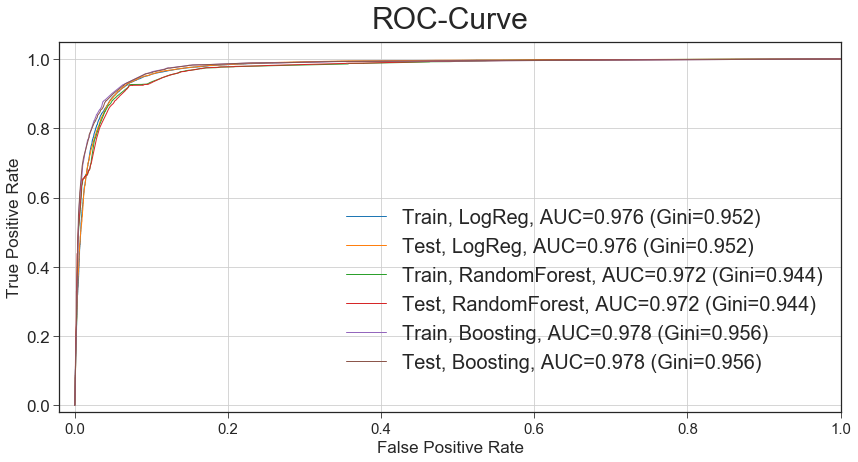

In [6]:
my_config = my_plot.PlotConfig(
    #style='ggplot',
    figure_size=(14,15),
    title_size=30,
    title_pad=1.02,
    xtick_size=15,
    x_grid=True,
    y_grid=True,
    legend_size=20,
    legend_loc=(1,0.6)
)
my_plot.plot_metrics(all_stats, pred=['LogReg','RandomForest','Boosting'], 
                     fact='True_Y', segments=segments, metric='roc', rnd=3, plot_config=my_config)

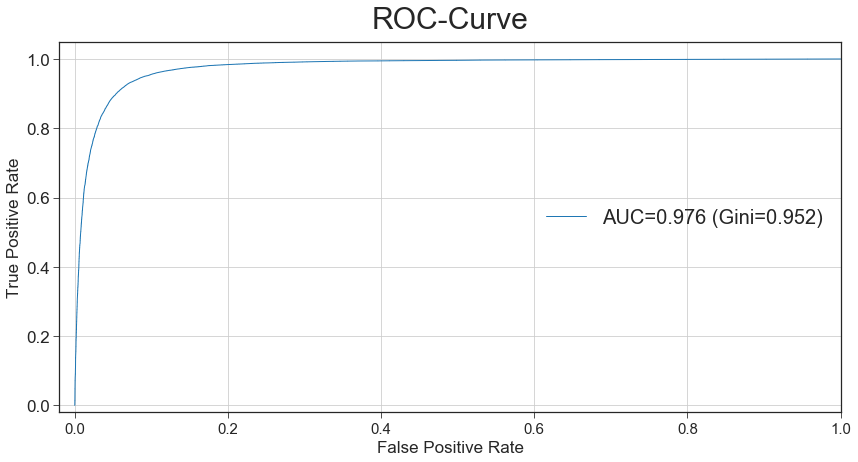

In [8]:
my_plot.plot_metrics(all_stats, pred=['LogReg'], fact='True_Y', metric='roc', rnd=3, plot_config=my_config)

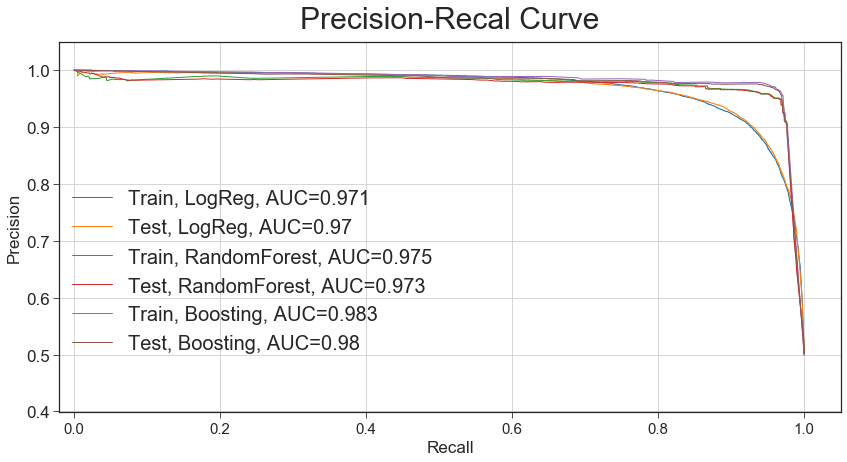

In [6]:
my_config = my_plot.PlotConfig(
    #style='ggplot',
    figure_size=(14,15),
    title_size=30,
    title_pad=1.02,
    xtick_size=15,
    x_grid=True,
    y_grid=True,
    legend_size=20,
    legend_loc=(0.5,0.65)
)

my_plot.plot_metrics(all_stats, pred=['LogReg','RandomForest','Boosting'], 
                     fact='True_Y', segments=segments, metric='pr', rnd=3, plot_config=my_config)

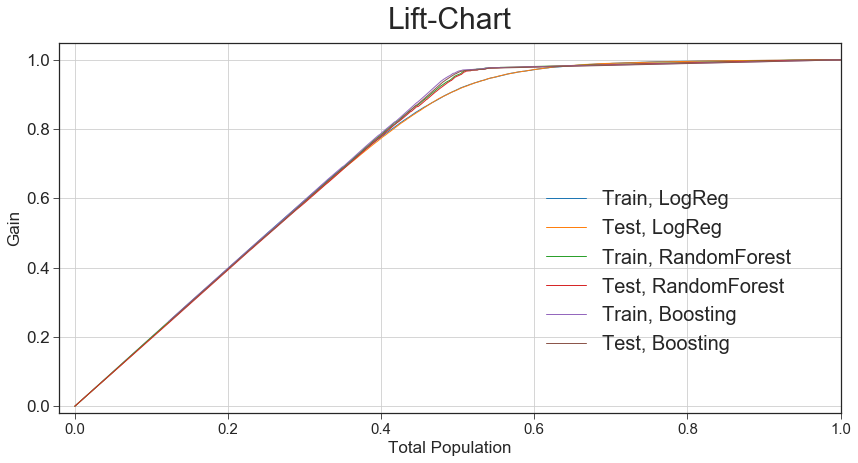

In [8]:
my_config = my_plot.PlotConfig(
    #style='ggplot',
    figure_size=(14,15),
    title_size=30,
    title_pad=1.02,
    xtick_size=15,
    x_grid=True,
    y_grid=True,
    legend_size=20,
    legend_loc=(0.6,0.65)
)

my_plot.plot_metrics(all_stats, pred=['LogReg','RandomForest','Boosting'], 
                     fact='True_Y', segments=segments, metric='lift', rnd=3, plot_config=my_config)

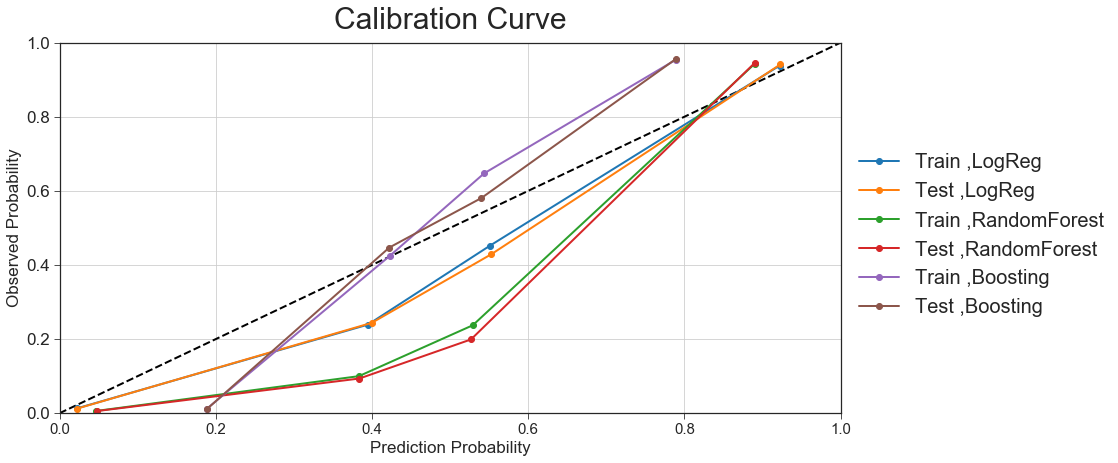

,bin,bin_num,cnt,pred_prob,obs_prob,population,segment,pred
0,"(0.0, 0.3]",0,18262,0.022368,0.013087,45.66,Train,LogReg
1,"(0.3, 0.5]",1,778,0.394815,0.239075,1.94,Train,LogReg
2,"(0.5, 0.6]",2,425,0.550772,0.451765,1.06,Train,LogReg
3,"(0.6, 1.0]",3,20535,0.921777,0.937911,51.34,Train,LogReg
0,"(0.0, 0.3]",0,17980,0.022409,0.012403,44.95,Test,LogReg
1,"(0.3, 0.5]",1,828,0.399811,0.243961,2.07,Test,LogReg
2,"(0.5, 0.6]",2,415,0.552696,0.428916,1.04,Test,LogReg
3,"(0.6, 1.0]",3,20777,0.922708,0.941089,51.94,Test,LogReg
0,"(0.0, 0.3]",0,17897,0.046816,0.006090,44.74,Train,RandomForest
1,"(0.3, 0.5]",1,1110,0.383190,0.100000,2.78,Train,RandomForest


In [8]:
my_config = my_plot.PlotConfig(
    #style='ggplot',
    figure_size=(14,15),
    title_size=30,
    title_pad=1.02,
    xtick_size=15,
    x_grid=True,
    y_grid=True,
    legend_size=20,
    legend_loc=(1,0.75),
    line_widths=2
)

my_plot.calibration(all_stats, pred=['LogReg','RandomForest','Boosting'], 
                     fact='True_Y', segments=segments, bins=[0,0.3,0.5,0.6,1], plot_config=my_config)

No handles with labels found to put in legend.


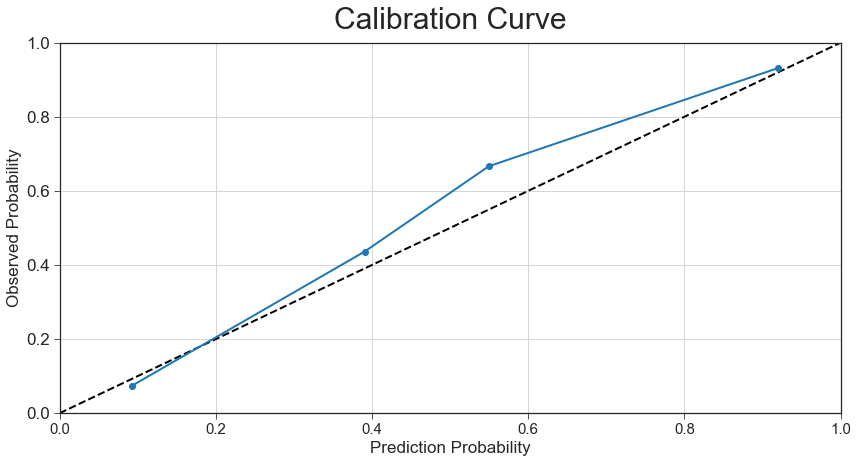

,bin,bin_num,cnt,pred_prob,obs_prob,population
0,"(0.0, 0.3]",0,37340,0.092802,0.074237,46.68
1,"(0.3, 0.5]",1,4088,0.390553,0.436155,5.11
2,"(0.5, 0.6]",2,1726,0.549460,0.666280,2.16
3,"(0.6, 1.0]",3,36846,0.920300,0.931634,46.06


In [5]:
my_config = my_plot.PlotConfig(
    #style='ggplot',
    figure_size=(14,15),
    title_size=30,
    title_pad=1.02,
    xtick_size=15,
    x_grid=True,
    y_grid=True,
    legend_size=20,
    legend_loc=(1,0.75),
    line_widths=2
)

my_plot.calibration(all_stats, pred=['LogReg',], 
                     fact='True_Y', bins=[0,0.3,0.5,0.6,1], plot_config=my_config)